In [60]:
%matplotlib inline

import pandas as pd
import numpy as np
import pylab as pl
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
import seaborn as sns

In [61]:
columns = ["var","skewness","curtosis","entropy","class"]
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00267/\
data_banknote_authentication.txt",index_col=False, names = columns)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
var         1372 non-null float64
skewness    1372 non-null float64
curtosis    1372 non-null float64
entropy     1372 non-null float64
class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


d:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
d:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


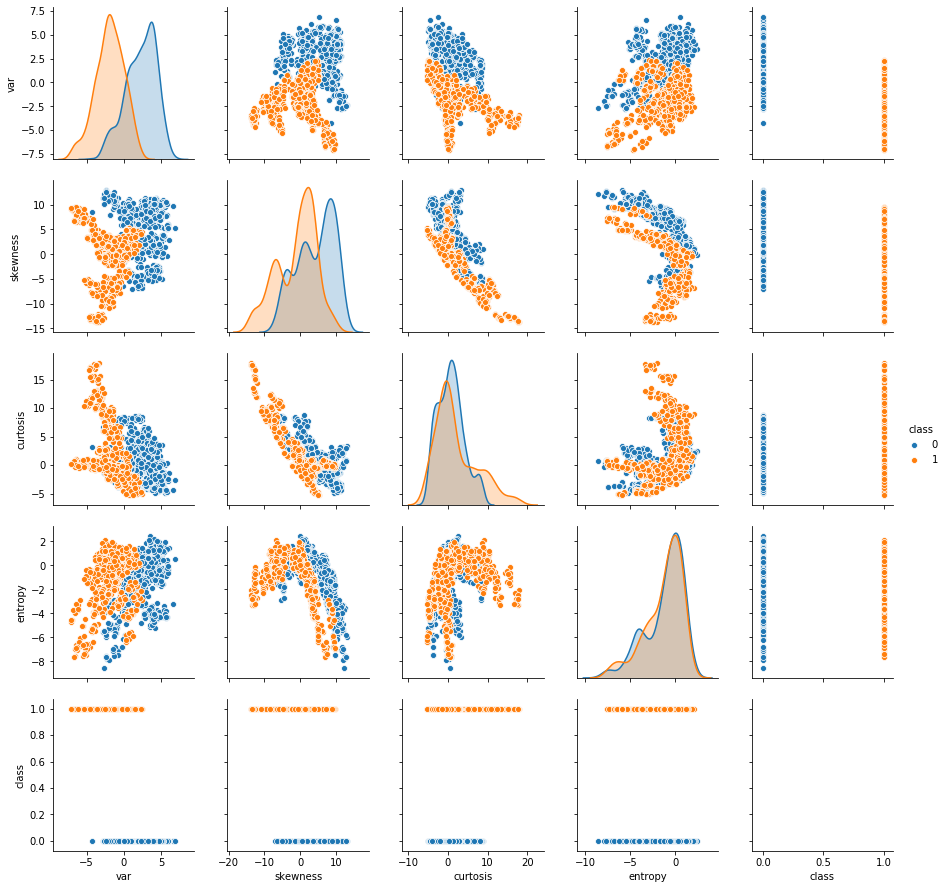

In [63]:
sns.pairplot(df , diag_kind='kde' , hue='class')

In [44]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values


In [45]:
X.shape

(1372, 4)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [47]:

for n_neighbors in [3,4,5,6]:
    for distancemetric in [1,2]:
        for algorithms in ['auto', 'ball_tree', 'kd_tree', 'brute']:
            for weights in ['uniform', 'distance']:
                if (distancemetric == 1):
                    d_metric="Manhattan distance"
                else:
                    d_metric="Euclidean distance"
  
                clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights,algorithm=algorithms,p=distancemetric )
                clf.fit(X_train, y_train)
  
                accuracy=clf.score(X_test,y_test)
                print("No of neighbors: "+str(n_neighbors)+", Distance metric: "+d_metric+", Algorithm is: " + algorithms +  ", weights: "+ weights+ ", Accuracy is: "+ str(accuracy))
            print(" ")
      


No of neighbors: 3, Distance metric: Manhattan distance, Algorithm is: auto, weights: uniform, Accuracy is: 0.9975728155339806
No of neighbors: 3, Distance metric: Manhattan distance, Algorithm is: auto, weights: distance, Accuracy is: 0.9975728155339806
 
No of neighbors: 3, Distance metric: Manhattan distance, Algorithm is: ball_tree, weights: uniform, Accuracy is: 0.9975728155339806
No of neighbors: 3, Distance metric: Manhattan distance, Algorithm is: ball_tree, weights: distance, Accuracy is: 0.9975728155339806
 
No of neighbors: 3, Distance metric: Manhattan distance, Algorithm is: kd_tree, weights: uniform, Accuracy is: 0.9975728155339806
No of neighbors: 3, Distance metric: Manhattan distance, Algorithm is: kd_tree, weights: distance, Accuracy is: 0.9975728155339806
 
No of neighbors: 3, Distance metric: Manhattan distance, Algorithm is: brute, weights: uniform, Accuracy is: 0.9975728155339806
No of neighbors: 3, Distance metric: Manhattan distance, Algorithm is: brute, weights

In [50]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from statistics import mean, stdev

from sklearn import neighbors

In [51]:
score_dict = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

In [52]:

num_folds = 10
seed = 1
n_neighbors = 3
weights = 'distance'
metric = "Euclidean distance"

skf = StratifiedKFold(n_splits=num_folds, random_state=seed , shuffle=True )

clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights,algorithm='kd_tree',p=2 )

results = cross_validate(clf, X, y, cv=skf , scoring=score_dict)


In [53]:

for key in results:
    print(key , mean(results[key]) , stdev(results[key]) )
    print(''.format(key, mean(results[key])*100.0, stdev(results[key])*100.0))



fit_time 0.0016093730926513671 0.0016820270280878315

score_time 0.004453897476196289 0.0025215390113535355

test_accuracy 0.9992700729927008 0.0023082318687360406

test_precision 0.9983870967741936 0.005100447838981253

test_recall 1.0 0.0

test_f1_score 0.9991869918699187 0.0025709574472913793



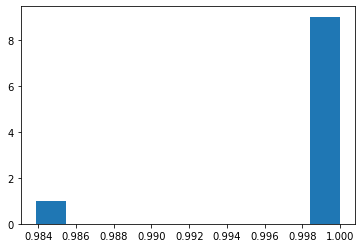

95.0 confidence interval for precision metric 98.8% and 100.0%


In [57]:
import matplotlib.pyplot as plt

# plot scores
plt.hist(results['test_precision'])
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results['test_precision'], p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results['test_precision'], p))
print('%.1f confidence interval for precision metric %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [ ]:
# Try this on Naive Bayes

neg_class_prob_sorted = NB_optimal.feature_log_prob_[0, :].argsort()
pos_class_prob_sorted = NB_optimal.feature_log_prob_[1, :].argsort()